In [1]:
import sys
from pathlib import Path

repo_root = Path("..").resolve()
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))

data_dir = repo_root / "Data"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


from apclust.data_io import load_matrix
from apclust.stats import summarize_features, summarize_samples, feature_correlations
from apclust.plots import feature_histograms, pairwise_scatter, feature_scatter_matrix,pca_projection

In [3]:
csv_matrix = load_matrix(data_dir / "VDX_3_SV.csv")
hk_matrix = load_matrix(data_dir / "vdx_dict.npy", key="HK_3")
pam_matrix = load_matrix(data_dir / "vdx_dict.npy", key="PAM50")
all_matrix = load_matrix(data_dir / "vdx_dict.npy", key="all")

print("CSV matrix:", csv_matrix.values.shape)
print("  sample_ids:", csv_matrix.sample_ids[:3])
print("  feature_names:", csv_matrix.feature_names)

print("\nHK_3 matrix:", hk_matrix.values.shape)
print("  sample_ids:", hk_matrix.sample_ids[:3])
print("  feature_names:", hk_matrix.feature_names)

print("\nPAM50 matrix:", pam_matrix.values.shape)
print("  sample_ids:", pam_matrix.sample_ids[:3])
print("  feature_names:", pam_matrix.feature_names[:5])

print("\nAll matrix:", all_matrix.values.shape)
print("  sample_ids:", all_matrix.sample_ids[:3])
print("  feature_names:", all_matrix.feature_names[:5])

CSV matrix: (344, 3)
  sample_ids: ('sample_0', 'sample_1', 'sample_2')
  feature_names: ('feature_0', 'feature_1', 'feature_2')

HK_3 matrix: (344, 3)
  sample_ids: ('VDX_3', 'VDX_5', 'VDX_6')
  feature_names: ('205225_at', '216836_s_at', '208079_s_at')

PAM50 matrix: (344, 90)
  sample_ids: ('VDX_3', 'VDX_5', 'VDX_6')
  feature_names: ('201397_at', '201710_at', '201820_at', '201890_at', '201983_s_at')

All matrix: (344, 22283)
  sample_ids: ('VDX_3', 'VDX_5', 'VDX_6')
  feature_names: ('1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at')


In [4]:
diff = np.abs(csv_matrix.values - hk_matrix.values)
print("Max absolute difference:", diff.max())
print("Allclose:", np.allclose(csv_matrix.values, hk_matrix.values))

Max absolute difference: 4.981401957593334e-09
Allclose: True


In [5]:
hk_feature_summary = summarize_features(hk_matrix)
hk_feature_summary

,mean,std,min,q1,median,q3,max
feature,,,,,,,
205225_at,11.377735,2.378282,6.685099,8.889120,12.105215,13.469285,14.849503
216836_s_at,11.529724,1.532115,8.495855,10.534195,11.174926,11.919087,15.613827
208079_s_at,8.942194,1.038267,5.422906,8.254673,9.063798,9.650692,11.643315


In [6]:
hk_sample_summary = summarize_samples(hk_matrix)
hk_sample_summary.describe()

,mean,std,min,q1,median,q3,max
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,10.616551,2.143024,8.524573,9.598567,10.672561,11.662540,12.652520
std,0.916208,0.888948,0.921755,0.760825,1.091069,1.204975,1.649561
min,8.651234,0.136563,5.422906,7.980653,8.673132,8.728923,8.752213
25%,9.801040,1.432220,7.876670,8.977351,9.654725,10.544484,11.084508
50%,10.794744,2.217380,8.473703,9.547886,10.760021,12.010690,13.053154
75%,11.227848,2.874885,9.088918,10.062228,11.452921,12.557927,13.995707
max,13.567643,4.548878,11.584869,12.586727,14.191715,14.559030,15.613827


In [7]:
# raw per-sample stats
hk_sample_summary.head()

,mean,std,min,q1,median,q3,max
sample,,,,,,,
VDX_3,9.324307,2.020191,7.015694,8.602327,10.188960,10.478613,10.768267
VDX_5,10.406071,2.102837,8.518063,9.272915,10.027768,11.350074,12.672381
VDX_6,9.381191,1.063017,8.185371,8.962323,9.739274,9.979100,10.218926
VDX_7,9.181812,0.402128,8.789208,8.976303,9.163398,9.378114,9.592831
VDX_8,11.424282,3.016776,8.263973,9.999722,11.735471,13.004437,14.273402


In [8]:
#hk_3 correlation matrix 
hk_corr = feature_correlations(hk_matrix)
hk_corr

feature,205225_at,216836_s_at,208079_s_at
feature,,,
205225_at,1.000000,0.061753,-0.369368
216836_s_at,0.061753,1.000000,-0.047949
208079_s_at,-0.369368,-0.047949,1.000000


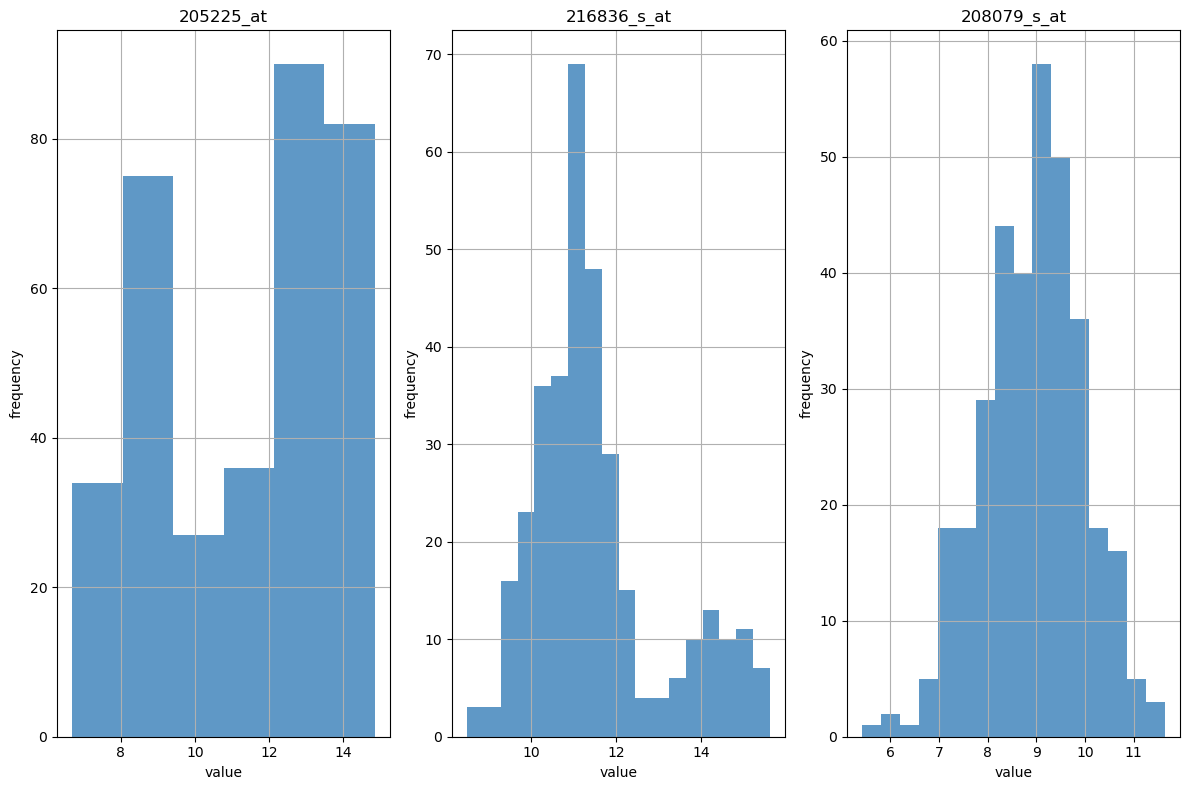

In [27]:
fd_bins = [6, 18, 16]  # 205225_at, 216836_s_at, 208079_s_at
_ = feature_histograms(
    hk_matrix,
    features=hk_matrix.feature_names,
    bins=fd_bins,
    figsize=(12, 8),
)
fig = plt.gcf()
for ax in fig.axes:
    ax.grid(True)

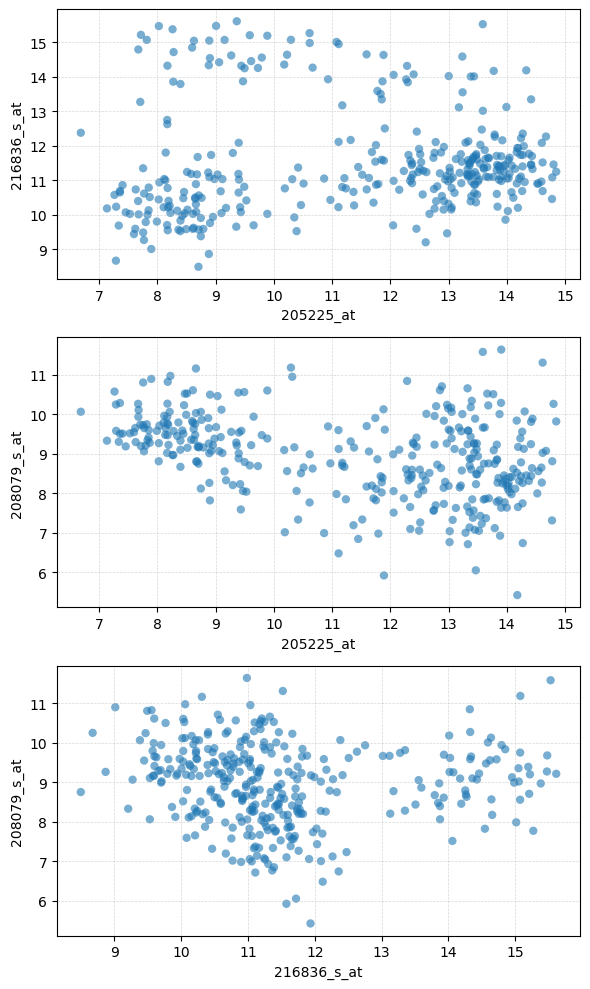

In [10]:
_ = pairwise_scatter(hk_matrix, alpha=0.6, figsize=(6, 10))

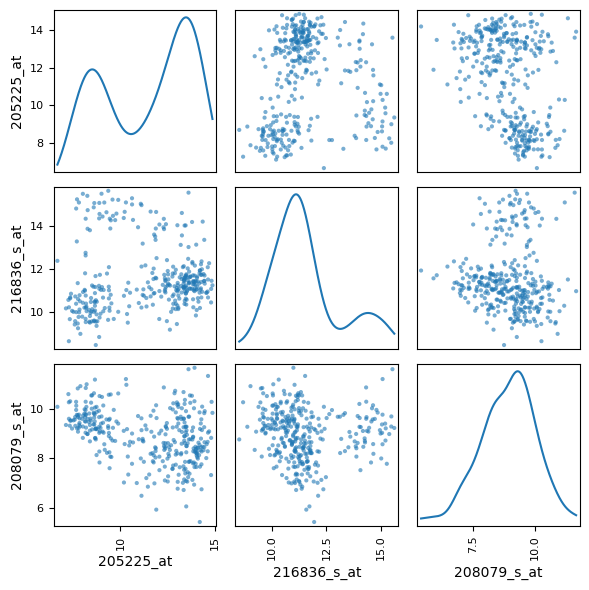

In [11]:
# no need to show this since we plot histogram; diagonals show the KDEs from the scatterplot matrix: these are meant to show the multimodality and the marginal distributions. 
_ = feature_scatter_matrix(
    hk_matrix,
    features=hk_matrix.feature_names,
    figsize=(6, 6),
    diagonal="kde",
    alpha=0.6,
)

In [12]:
from dataclasses import replace
from sklearn.preprocessing import StandardScaler
from typing import Tuple

from apclust.data_io import DataMatrix
from apclust.clustering.affinity import run_affinity_propagation, AffinityResult

def standardize_matrix(matrix: DataMatrix) -> Tuple[DataMatrix, StandardScaler]:
    scaler = StandardScaler()
    scaled = scaler.fit_transform(matrix.values)
    standardized = DataMatrix(
        values=scaled,
        sample_ids=matrix.sample_ids,
        feature_names=matrix.feature_names,
    )
    return standardized, scaler

def affinity_summary(result: AffinityResult, label: str) -> None:
    unique, counts = np.unique(result.labels, return_counts=True)
    print(f"{label}: {len(unique)} clusters, {result.n_iter} iterations")
    display(pd.Series(counts, index=unique, name="cluster size").to_frame())

In [13]:
hk_std, hk_scaler = standardize_matrix(hk_matrix)
pam_std, pam_scaler = standardize_matrix(pam_matrix)

hk_orig_result = run_affinity_propagation(hk_matrix, random_state=0)
hk_std_result = run_affinity_propagation(hk_std, random_state=0)

pam_orig_result = run_affinity_propagation(pam_matrix, random_state=0)
pam_std_result = run_affinity_propagation(pam_std, random_state=0)

affinity_summary(hk_orig_result, "HK_3 (raw)")
affinity_summary(hk_std_result, "HK_3 (standardized)")
affinity_summary(pam_orig_result, "PAM50 (raw)")
affinity_summary(pam_std_result, "PAM50 (standardized)")

HK_3 (raw): 16 clusters, 31 iterations


,cluster size
0,13
1,16
2,26
3,20
4,31
5,55
6,13
7,23
8,20
9,13


HK_3 (standardized): 19 clusters, 33 iterations


,cluster size
0,4
1,4
2,11
3,12
4,10
5,10
6,20
7,25
8,34
9,17


PAM50 (raw): 17 clusters, 29 iterations


,cluster size
0,20
1,24
2,10
3,33
4,32
5,18
6,11
7,23
8,30
9,18


PAM50 (standardized): 19 clusters, 26 iterations


,cluster size
0,7
1,17
2,2
3,6
4,33
5,11
6,27
7,34
8,32
9,25


In [14]:
def label_alignment(raw_labels, std_labels, title):
    df = pd.crosstab(raw_labels, std_labels, rownames=["raw"], colnames=["standardized"])
    print(title)
    display(df)

label_alignment(hk_orig_result.labels, hk_std_result.labels, "HK_3 label cross-tab")
label_alignment(pam_orig_result.labels, pam_std_result.labels, "PAM50 label cross-tab")

HK_3 label cross-tab


standardized,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
raw,,,,,,,,,,,,,,,,,,,
0,0,0,0,11,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,10,0,0,0,0,0,0,6,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,15,0,2,0,0,2,0,6,0,0
3,0,1,0,0,0,0,17,0,0,0,0,0,0,0,0,2,0,0,0
4,3,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,5,0,0,0,0,29,8,0,13,0,0
6,0,2,9,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,14,0,0,0,0,0,0,9,0,0,0,0
8,0,0,0,1,0,0,0,10,0,0,0,0,0,0,7,0,2,0,0


PAM50 label cross-tab


standardized,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
raw,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,1,0,0,0,0,11,0,6,0,0,0,1
1,0,1,0,0,3,0,3,5,9,0,0,2,0,0,0,0,1,0,0
2,0,0,0,4,0,2,0,0,0,0,0,0,0,0,0,1,3,0,0
3,0,0,1,0,1,0,18,3,2,0,0,6,0,0,0,2,0,0,0
4,0,2,0,0,10,0,1,16,1,0,0,0,0,1,0,0,1,0,0
5,0,4,0,0,0,0,3,1,2,3,0,1,0,4,0,0,0,0,0
6,1,1,0,0,4,0,0,4,0,0,0,0,0,0,0,0,1,0,0
7,0,8,0,0,11,0,0,2,2,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,3,0,0,1,0,21,0,0,0,4,0,0,0,0,0


## Raw. 

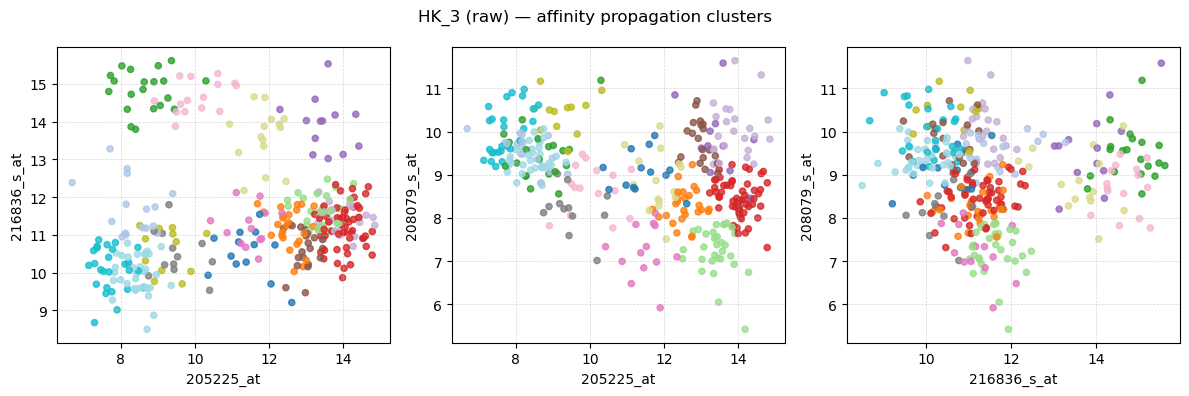

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
pairs = [("205225_at", "216836_s_at"), ("205225_at", "208079_s_at"), ("216836_s_at", "208079_s_at")]
for ax, (f1, f2) in zip(axes, pairs):
    i = hk_matrix.feature_names.index(f1)
    j = hk_matrix.feature_names.index(f2)
    ax.scatter(
        hk_matrix.values[:, i],
        hk_matrix.values[:, j],
        c=hk_orig_result.labels,
        cmap="tab20",
        s=20,
        alpha=0.8,
    )
    ax.set_xlabel(f1)
    ax.set_ylabel(f2)
    ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)

fig.suptitle("HK_3 (raw) — affinity propagation clusters")
fig.tight_layout()

In [16]:
from sklearn.decomposition import PCA

def pca_scatter(matrix: DataMatrix, labels: np.ndarray, title: str) -> None:
    scaler = StandardScaler()
    X = scaler.fit_transform(matrix.values)
    pca = PCA(n_components=2, random_state=0)
    coords = pca.fit_transform(X)
    fig, ax = plt.subplots(figsize=(7, 6))
    scatter = ax.scatter(coords[:, 0], coords[:, 1], c=labels, cmap="tab20", s=15, alpha=0.8)
    ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)")
    ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)")
    ax.set_title(title)
    ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
    fig.colorbar(scatter, ax=ax, label="cluster id")
    fig.tight_layout()

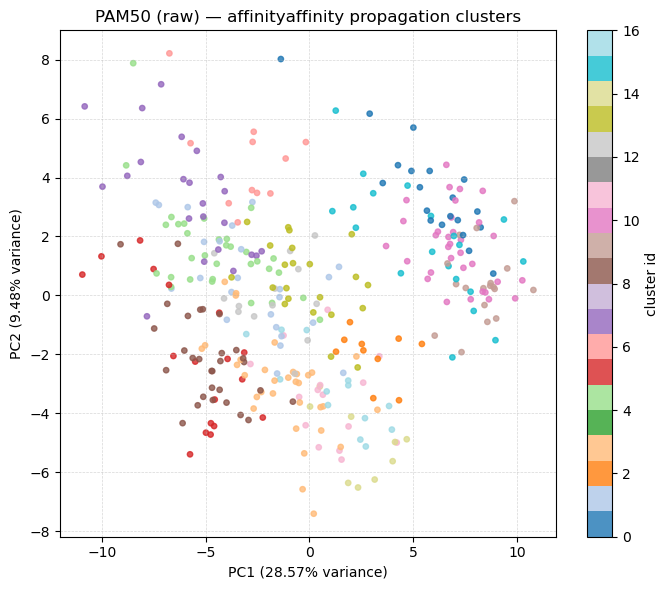

In [17]:
pca_scatter(pam_matrix, pam_orig_result.labels, "PAM50 (raw) — affinityaffinity propagation clusters")   

## Standardized.

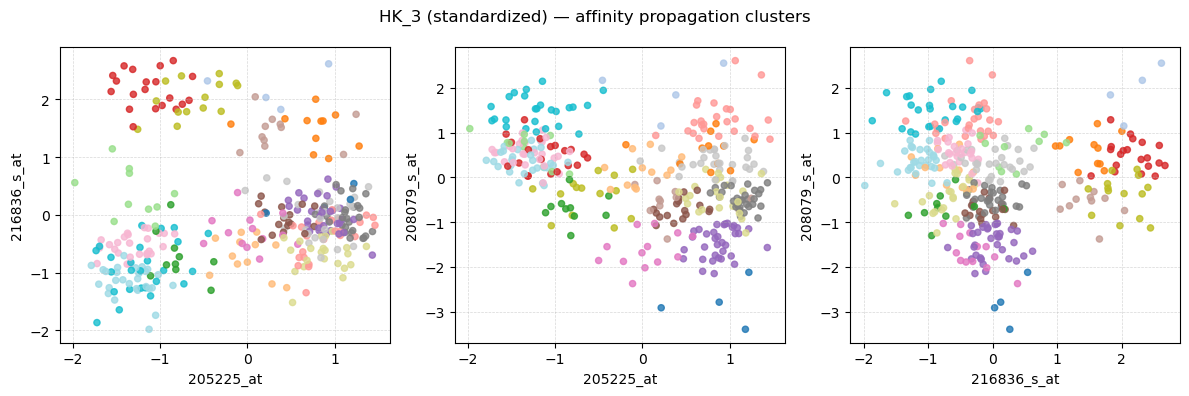

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
pairs = [("205225_at", "216836_s_at"), ("205225_at", "208079_s_at"), ("216836_s_at", "208079_s_at")]
for ax, (f1, f2) in zip(axes, pairs):
    i = hk_std.feature_names.index(f1)
    j = hk_std.feature_names.index(f2)
    ax.scatter(
        hk_std.values[:, i],
        hk_std.values[:, j],
        c=hk_std_result.labels,
        cmap="tab20",
        s=20,
        alpha=0.8,
    )
    ax.set_xlabel(f1)
    ax.set_ylabel(f2)
    ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)

fig.suptitle("HK_3 (standardized) — affinity propagation clusters")
fig.tight_layout()

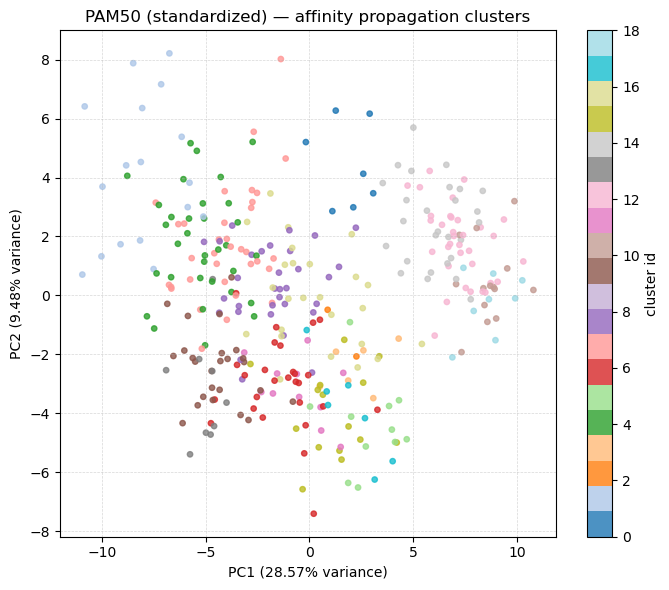

In [19]:
pca_scatter(pam_std, pam_std_result.labels, "PAM50 (standardized) — affinity propagation clusters")

In [20]:
## Effects of standardization 

In [21]:
import apclust.metrics as metrics_module
from apclust.metrics import cluster_counts, contingency_table, partition_metrics

In [22]:
# cluster size tables
hk_raw_counts = cluster_counts(hk_orig_result.labels, name="cluster")
hk_std_counts = cluster_counts(hk_std_result.labels, name="cluster")

pam_raw_counts = cluster_counts(pam_orig_result.labels, name="cluster")
pam_std_counts = cluster_counts(pam_std_result.labels, name="cluster")

print("HK_3 (raw) cluster sizes")
display(hk_raw_counts)

print("HK_3 (standardized) cluster sizes")
display(hk_std_counts)

print("PAM50 (raw) cluster sizes")
display(pam_raw_counts)

print("PAM50 (standardized) cluster sizes")
display(pam_std_counts)

HK_3 (raw) cluster sizes


,cluster,size
0,0,13
1,1,16
2,2,26
3,3,20
4,4,31
5,5,55
6,6,13
7,7,23
8,8,20
9,9,13


HK_3 (standardized) cluster sizes


,cluster,size
0,0,4
1,1,4
2,2,11
3,3,12
4,4,10
5,5,10
6,6,20
7,7,25
8,8,34
9,9,17


PAM50 (raw) cluster sizes


,cluster,size
0,0,20
1,1,24
2,2,10
3,3,33
4,4,32
5,5,18
6,6,11
7,7,23
8,8,30
9,9,18


PAM50 (standardized) cluster sizes


,cluster,size
0,0,7
1,1,17
2,2,2
3,3,6
4,4,33
5,5,11
6,6,27
7,7,34
8,8,32
9,9,25


In [23]:
# cross-tabulations
hk_crosstab = contingency_table(hk_orig_result.labels, hk_std_result.labels)
pam_crosstab = contingency_table(pam_orig_result.labels, pam_std_result.labels)

print("HK_3 raw ↔ standardized clusters")
display(hk_crosstab)

print("PAM50 raw ↔ standardized clusters")
display(pam_crosstab)

HK_3 raw ↔ standardized clusters


labels_b,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
labels_a,,,,,,,,,,,,,,,,,,,
0,0,0,0,11,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,10,0,0,0,0,0,0,6,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,15,0,2,0,0,2,0,6,0,0
3,0,1,0,0,0,0,17,0,0,0,0,0,0,0,0,2,0,0,0
4,3,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,5,0,0,0,0,29,8,0,13,0,0
6,0,2,9,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,14,0,0,0,0,0,0,9,0,0,0,0
8,0,0,0,1,0,0,0,10,0,0,0,0,0,0,7,0,2,0,0


PAM50 raw ↔ standardized clusters


labels_b,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
labels_a,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,1,0,0,0,0,11,0,6,0,0,0,1
1,0,1,0,0,3,0,3,5,9,0,0,2,0,0,0,0,1,0,0
2,0,0,0,4,0,2,0,0,0,0,0,0,0,0,0,1,3,0,0
3,0,0,1,0,1,0,18,3,2,0,0,6,0,0,0,2,0,0,0
4,0,2,0,0,10,0,1,16,1,0,0,0,0,1,0,0,1,0,0
5,0,4,0,0,0,0,3,1,2,3,0,1,0,4,0,0,0,0,0
6,1,1,0,0,4,0,0,4,0,0,0,0,0,0,0,0,1,0,0
7,0,8,0,0,11,0,0,2,2,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,3,0,0,1,0,21,0,0,0,4,0,0,0,0,0


In [24]:
# agreement metrics
hk_metrics = partition_metrics(hk_orig_result.labels, hk_std_result.labels)
pam_metrics = partition_metrics(pam_orig_result.labels, pam_std_result.labels)

print("HK_3 partition agreement")
display(hk_metrics.to_frame().T)

print("PAM50 partition agreement")
display(pam_metrics.to_frame().T)

HK_3 partition agreement


,ARI,AMI
0,0.490398,0.680546


PAM50 partition agreement


,ARI,AMI
0,0.316222,0.487297
